In [1]:
#Hrudai Battini HW 1, Part 2 Aplied Machine Learning
import numpy as np
import seaborn as sns
import os
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


In [2]:
#Part 1 Titanic Dataset imports 
X = pd.read_csv("titanictrain.csv")
X_test = pd.read_csv("titanictest.csv")
lenx = len(X)
df = pd.concat([X,X_test])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [3]:
#1P2 Pre Processing Data 


out = []
for n in df.columns:
    if df[n].count() < 300:
        out.append(n)
print(out)
hold = df.drop(['Cabin','Name','Embarked','Ticket'],axis=1)

#One Hot Encoding the Categorical Variables in the dataset
df_Prep = pd.get_dummies(hold)
#Dealing with Missing Values via Interpolation
df_Prep = df_Prep.interpolate()


cols = df_Prep.columns

X_train = df_Prep.iloc[:lenx,:]
X_test = df_Prep.iloc[lenx:,:]
#Step 1. 
X_train.head()

['Cabin']


PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  \
0            1       0.0       3  22.0      1      0   7.2500           0   
1            2       1.0       1  38.0      1      0  71.2833           1   
2            3       1.0       3  26.0      0      0   7.9250           1   
3            4       1.0       1  35.0      1      0  53.1000           1   
4            5       0.0       3  35.0      0      0   8.0500           0   

   Sex_male  
0         1  
1         0  
2         0  
3         0  
4         1

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.025332 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.062164 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.304934  0.083081  0.018443   
Age             0.025332 -0.062164 -0.304934  1.000000 -0.213410 -0.170013   
SibSp          -0.057527 -0.035322  0.083081 -0.213410  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.170013  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.087119  0.159651  0.216225   
Sex_female     -0.042939  0.543351 -0.131900 -0.061332  0.114631  0.245489   
Sex_male        0.042939 -0.543351  0.131900  0.061332 -0.114631 -0.245489   

                 Fare  Sex_female  Sex_male  
PassengerId  0.012658   -0.042939  0.042939  
Survived     0.257307    0.543351 -0.543351  
Pclass      -0.549500   -0.131900  0.131900  
Age          0.087119   -0.061332  

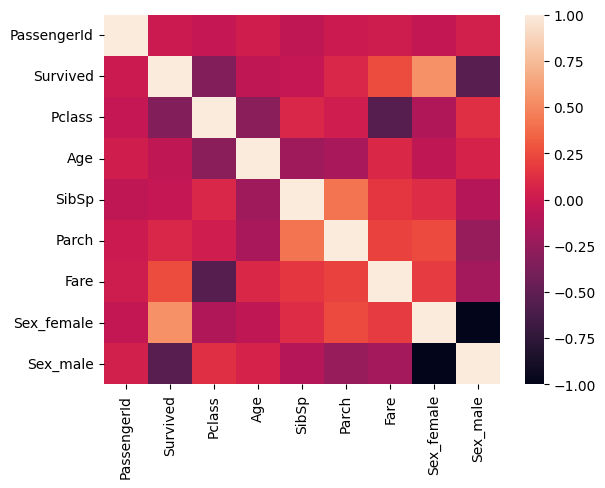

In [4]:
#2 Feature Selection 
corrMat = X_train.corr()
print(corrMat)
sns.heatmap(corrMat)
#Drop features of correlation <0.3 abs value relative to surived feature
drop_cols = [col for col in corrMat.columns if abs(corrMat['Survived'][col]) < 0.02]

c1 = ["Survived"]
X_train_set = X_train.drop(drop_cols,axis=1)
X_train_set = X_train_set.drop(c1,axis=1)
X_test_set = X_test.drop(drop_cols,axis=1)
X_test_set = X_test_set.drop(c1,axis=1)

0.7934904601571269


c:\Users\hruda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
